In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import zscore,pearsonr,ttest_1samp,ttest_ind,ttest_rel

pd.DataFrame.iteritems = pd.DataFrame.items
# Set the default plots style
sns.set_theme(style="white")

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.bottom'] = True
mpl.rcParams['axes.spines.left'] = True

# Set the default tick_params options for all axes
mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['xtick.top'] = False
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.left'] = True
mpl.rcParams['ytick.right'] = False
mpl.rcParams['ytick.direction'] = 'out'

# Set default text color
plt.rcParams['text.color'] = 'black'

# Set default axes label color
plt.rcParams['axes.labelcolor'] = 'black'

# Set default x and y tick colors
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'


def p2sign(p):
    if  p<=0.001:
        sign='***'
    elif p<=0.01:
        sign='**'
    elif p<=0.05:
        sign='*'
    else:
        sign=''
    return sign

## Plot the correlation between the structural measures and the funcitonal measures

In [60]:
metrics = pd.read_csv(r'/mnt/workdir/DCM/Result/analysis/brain_metrics_game1_20230914.csv')

metrics['mPFC.thickness'] = (metrics['lh.mPFC.thickness'] + metrics['rh.mPFC.thickness'])/2
metrics['mPFC.volume'] = (metrics['lh.mPFC.volume'] + metrics['rh.mPFC.volume'])/2

metrics['EC.thickness'] = (metrics['lh.EC.thickness'] + metrics['rh.EC.thickness'])/2
metrics['EC.volume'] = (metrics['lh.EC.volume'] + metrics['rh.EC.volume'])/2

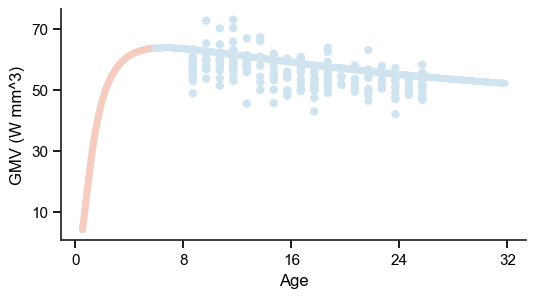

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


male_gmv = pd.read_csv(r'/mnt/workdir/DCM/Docs/Reference/BrainChart/data/male_GMV.csv',header=None, names=['Age', 'GMV'])
female_gmv = pd.read_csv(r'/mnt/workdir/DCM/Docs/Reference/BrainChart/data/female_GMV.csv',header=None, names=['Age', 'GMV'])

if len(male_gmv)<len(female_gmv):
    min_length = len(male_gmv)
else:
    min_length = len (female_gmv)
mean_gmv = (male_gmv['GMV'].to_numpy()[:min_length] + female_gmv['GMV'].to_numpy())/2
mean_age = (male_gmv['Age'].to_numpy()[:min_length] + female_gmv['Age'].to_numpy())/2

# calculate average GMV and generate new mean gmv
male_97gmv = pd.read_csv(r'/mnt/workdir/DCM/Docs/Reference/BrainChart/data/male_GMV_97.5percentage.csv',header=None, names=['Age', 'GMV'])
female_97gmv = pd.read_csv(r'/mnt/workdir/DCM/Docs/Reference/BrainChart/data/female_GMV_97.5percentage.csv',header=None, names=['Age', 'GMV'])

male_2gmv = pd.read_csv(r'/mnt/workdir/DCM/Docs/Reference/BrainChart/data/male_GMV_2.5percentage.csv',header=None, names=['Age', 'GMV'])
female_2gmv = pd.read_csv(r'/mnt/workdir/DCM/Docs/Reference/BrainChart/data/female_GMV_2.5percentage.csv',header=None, names=['Age', 'GMV'])

# calculate average GMV for 97th percentile and generate new mean 97gmv
if len(male_97gmv)<len(female_97gmv):
    min_length_97 = len(male_97gmv)
else:
    min_length_97 = len(female_97gmv)

mean_97gmv = (male_97gmv['GMV'].to_numpy()[:min_length_97] + female_97gmv['GMV'].to_numpy()[:min_length_97])/2
mean_age_97 = (male_97gmv['Age'].to_numpy()[:min_length_97] + female_97gmv['Age'].to_numpy()[:min_length_97])/2

# calculate average GMV for 2nd percentile and generate new mean 2gmv
if len(male_2gmv)<len(female_2gmv):
    min_length_2 = len(male_2gmv)
else:
    min_length_2 = len(female_2gmv)

mean_2gmv = (male_2gmv['GMV'].to_numpy()[:min_length_2] + female_2gmv['GMV'].to_numpy()[:min_length_2])/2
mean_age_2 = (male_2gmv['Age'].to_numpy()[:min_length_2] + female_2gmv['Age'].to_numpy()[:min_length_2])/2

# Assuming mean_age and mean_gmv are numpy arrays
mean_age = np.array(mean_age)
mean_gmv = np.array(mean_gmv)

fig,ax = plt.subplots(figsize=(6,3))

color = 'red'
for i in range(len(mean_age)-1):
    if mean_gmv[i+1] < mean_gmv[i]: # if the value increases
        color = 'blue'
    if color =='red':
        plt.plot(mean_age[i:i+2], mean_gmv[i:i+2], color='#F7CCC0',linewidth=5)
    else:#c3d5f2
        plt.plot(mean_age[i:i+2], mean_gmv[i:i+2], color='#D0E4EF',linewidth=5)
sub_gmv = pd.read_csv(r'/mnt/workdir/DCM/Docs/Reference/BrainChart/DCM_qyk.csv')
sub_gmv['GMV (W mm^3)'] = sub_gmv['GMV']/10000
sub_gmv['Age'] = sub_gmv['Age'] + 0.7
sns.scatterplot(data=sub_gmv,x='Age',y='GMV (W mm^3)', edgecolor='none', color='#D0E4EF', alpha=1)
plt.xticks([0,8,16,24,32])
plt.yticks([10,30,50,70])
plt.savefig(r'/mnt/workdir/DCM/Result/paper/figure6/brainchart_GMV.pdf', bbox_inches='tight', pad_inches=0, dpi=300, transparent=True)

169
Correlation between EC.FA and Age
r 0.189 p 0.014
169
Correlation between mPFC.FA and Age
r 0.213 p 0.005
169
Correlation between EC.MD and Age
r -0.181 p 0.018
169
Correlation between mPFC.MD and Age
r 0.02 p 0.801
169
Correlation between EC.FA and game1_acc
r 0.162 p 0.035
169
Correlation between mPFC.FA and game1_acc
r 0.18 p 0.019
169
Correlation between EC.MD and game1_acc
r -0.168 p 0.029
169
Correlation between mPFC.MD and game1_acc
r -0.019 p 0.806


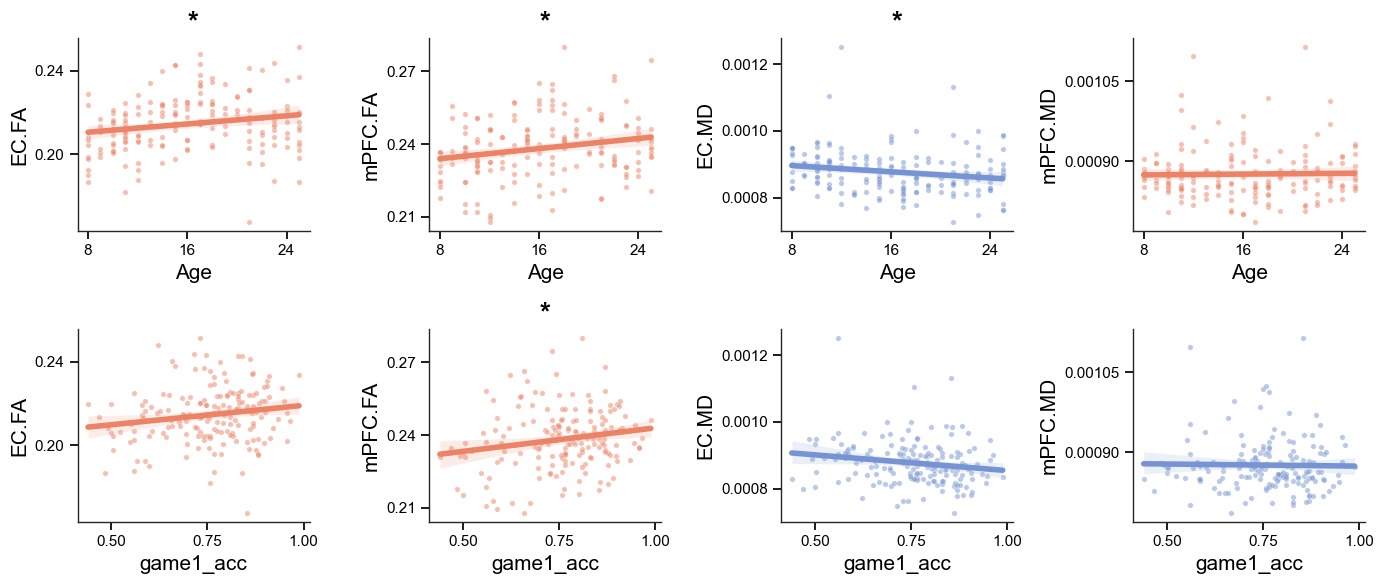

In [29]:
#brain_measures = ['EC.thickness','mPFC.thickness','EC.volume','mPFC.volume']
brain_measures = ['EC.FA','mPFC.FA','EC.MD','mPFC.MD']
beh_measures = ['Age','game1_acc']
# Initialize the plot
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(14,6),sharex='row')

from matplotlib.ticker import MaxNLocator
for i, beh_measure in enumerate(beh_measures):
    for j, brain_measure in enumerate(brain_measures):
        # Compute pearson correlation
        metrics = metrics.dropna(subset=[brain_measure])
        print(len(metrics))
        r, p = pearsonr(metrics[brain_measure], metrics[beh_measure])
        print("Correlation between %s and %s" % (brain_measure, beh_measure))
        print('r', round(r,3), 'p', round(p,3))
        
        if r >0:
            color = '#ec8266'
        else:
            color = '#7694d3'
        sns.scatterplot(data=metrics, x=beh_measure, y=brain_measure, color=color, s=15, alpha=.5, ax=axs[i][j])
        sns.regplot(data=metrics, x=beh_measure, y=brain_measure, color=color, order=1, scatter=False,line_kws={'linewidth': 4}, ax=axs[i][j])

        # Setup labels and despine
        axs[i,j].xaxis.set_major_locator(MaxNLocator(nbins=3))
        axs[i,j].yaxis.set_major_locator(MaxNLocator(nbins=3))

        axs[i][j].set_xlabel(beh_measure, fontsize=15)
            
        axs[i][j].set_ylabel(brain_measure, fontsize=15)
    
        axs[i][j].spines['left'].set_linewidth(1)
        axs[i][j].spines['bottom'].set_linewidth(1)            
        # Add title based on significance level
        axs[i][j].tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
        axs[i][j].tick_params(axis='y', which='both', left=True, right=False, direction='out')
        
        title = p2sign(p*2)
        axs[i][j].set_title(title, size=20, fontweight='bold')

# Uncomment the lines below if you want to save the figure
fig.tight_layout()
#savepath = '/mnt/workdir/DCM/Result/paper/figure6/corr_structural_behavior.pdf'
#plt.savefig(savepath, bbox_inches='tight', pad_inches=0, dpi=300, transparent=True)

# Show the plot
plt.show()

Correlation between EC.thickness and Age
r 0.331 p 0.0
Correlation between mPFC.thickness and Age
r -0.673 p 0.0
Correlation between EC.thickness and game1_acc
r 0.194 p 0.006
Correlation between mPFC.thickness and game1_acc
r -0.452 p 0.0


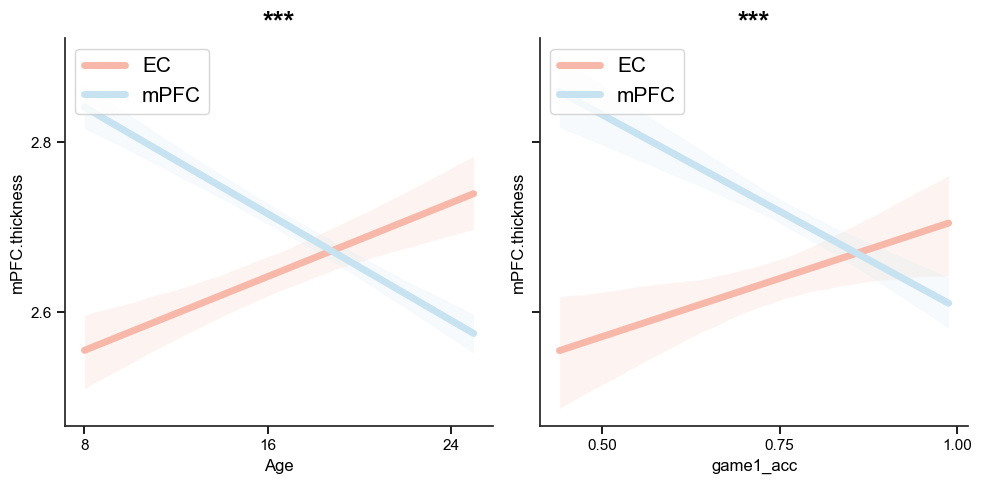

In [62]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler
scaler = MinMaxScaler()

brain_measures = ['EC.volume_mean','mPFC.volume_mean']
beh_measures = ['Age','game1_acc']

# divide NVoxels to get the mean volume 
metrics['EC.volume_mean'] = metrics['EC.volume']/2369
metrics['mPFC.volume_mean'] = metrics['mPFC.volume']/5367

# Initialize the plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5),sharey='row')

from matplotlib.ticker import MaxNLocator

for i, beh_measure in enumerate(beh_measures):
    for j, brain_measure in enumerate(brain_measures):
        # Compute pearson correlation
        r, p = pearsonr(metrics[brain_measure], metrics[beh_measure])
        print("Correlation between %s and %s" % (brain_measure, beh_measure))
        print('r', round(r,3), 'p', round(p,3))

        # Add labels
        if brain_measure == 'EC.thickness':
            brain_label = 'EC'
        elif brain_measure == 'mPFC.thickness':
            brain_label = 'mPFC'
            
        if r >0:
            color = '#F8B8A9'
        else:
            color = '#C7E2F0'
        # Normalize the y-axis data
        
        #sns.scatterplot(data=metrics, x=beh_measure, y=brain_measure, color=color, s=20, ax=axs[i])
        sns.regplot(data=metrics, x=beh_measure, y=brain_measure, color=color, order=1, scatter=False,line_kws={'linewidth': 5}, ax=axs[i],label=brain_label)

        # Setup labels and despine
        axs[i].xaxis.set_major_locator(MaxNLocator(nbins=3))
        axs[i].yaxis.set_major_locator(MaxNLocator(nbins=3))

        #axs[i].set_ylabel('Mean volume (mm^3/NVoxel)', fontsize=15)

        title = p2sign(p)
        axs[i].set_title(title, size=20, fontweight='bold')
        axs[i].legend(loc='upper left', fontsize=15)
    
# Uncomment the lines below if you want to save the figure
fig.tight_layout()
savepath = '/mnt/workdir/DCM/Result/paper/figure6/corr_structural-thickness_behavior.pdf'
plt.savefig(savepath, bbox_inches='tight', pad_inches=0, dpi=300, transparent=True)

# Show the plot
plt.show()

Correlation between EC.FA and Age
r 0.189 p 0.014
Correlation between mPFC.FA and Age
r 0.213 p 0.005
Correlation between EC.FA and game1_acc
r 0.162 p 0.035
Correlation between mPFC.FA and game1_acc
r 0.18 p 0.019


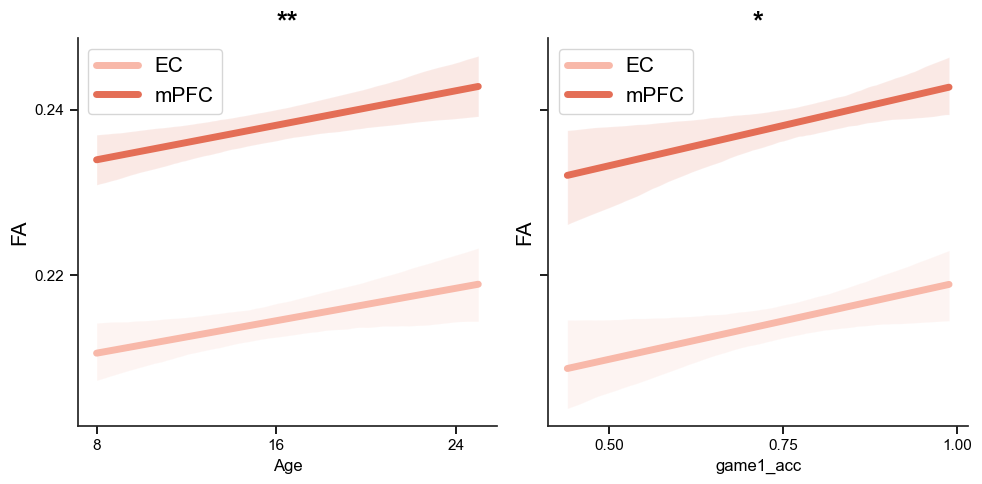

In [54]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler
scaler = MinMaxScaler()

brain_measures = ['EC.FA','mPFC.FA']
beh_measures = ['Age','game1_acc']

# divide NVoxels to get the mean volume 
# metrics['EC.volume_mean'] = metrics['EC.volume']/2369
# metrics['mPFC.volume_mean'] = metrics['mPFC.volume']/5367

# Initialize the plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5),sharey='row')

from matplotlib.ticker import MaxNLocator

for i, beh_measure in enumerate(beh_measures):
    for j, brain_measure in enumerate(brain_measures):
        # Compute pearson correlation
        r, p = pearsonr(metrics[brain_measure], metrics[beh_measure])
        print("Correlation between %s and %s" % (brain_measure, beh_measure))
        print('r', round(r,3), 'p', round(p,3))

        # Add labels
        if brain_measure == 'EC.FA':
            brain_label = 'EC'
        elif brain_measure == 'mPFC.FA':
            brain_label = 'mPFC'

        if brain_label == 'EC':
            color = '#F8B8A9'
        elif brain_label:
            color = '#e46e56'
        # Normalize the y-axis data

        #sns.scatterplot(data=metrics, x=beh_measure, y=brain_measure, color=color, s=20, ax=axs[i])
        sns.regplot(data=metrics, x=beh_measure, y=brain_measure, color=color, order=1, scatter=False,line_kws={'linewidth': 5}, ax=axs[i],label=brain_label)

        # Setup labels and despine
        axs[i].xaxis.set_major_locator(MaxNLocator(nbins=3))
        axs[i].yaxis.set_major_locator(MaxNLocator(nbins=3))

        axs[i].set_ylabel('FA', fontsize=15)

        title = p2sign(p)
        axs[i].set_title(title, size=20, fontweight='bold')
        axs[i].legend(loc='upper left', fontsize=15)

# Uncomment the lines below if you want to save the figure
fig.tight_layout()
savepath = '/mnt/workdir/DCM/Result/paper/figure6/corr_dwi_behavior.pdf'
plt.savefig(savepath, bbox_inches='tight', pad_inches=0, dpi=300, transparent=True)

# Show the plot
plt.show()

Correlation between HC.volume and Age
r 0.234 p 0.001
Correlation between HC.FA and Age
r 0.25 p 0.001
Correlation between HC.volume and game1_acc
r 0.278 p 0.0
Correlation between HC.FA and game1_acc
r 0.166 p 0.031


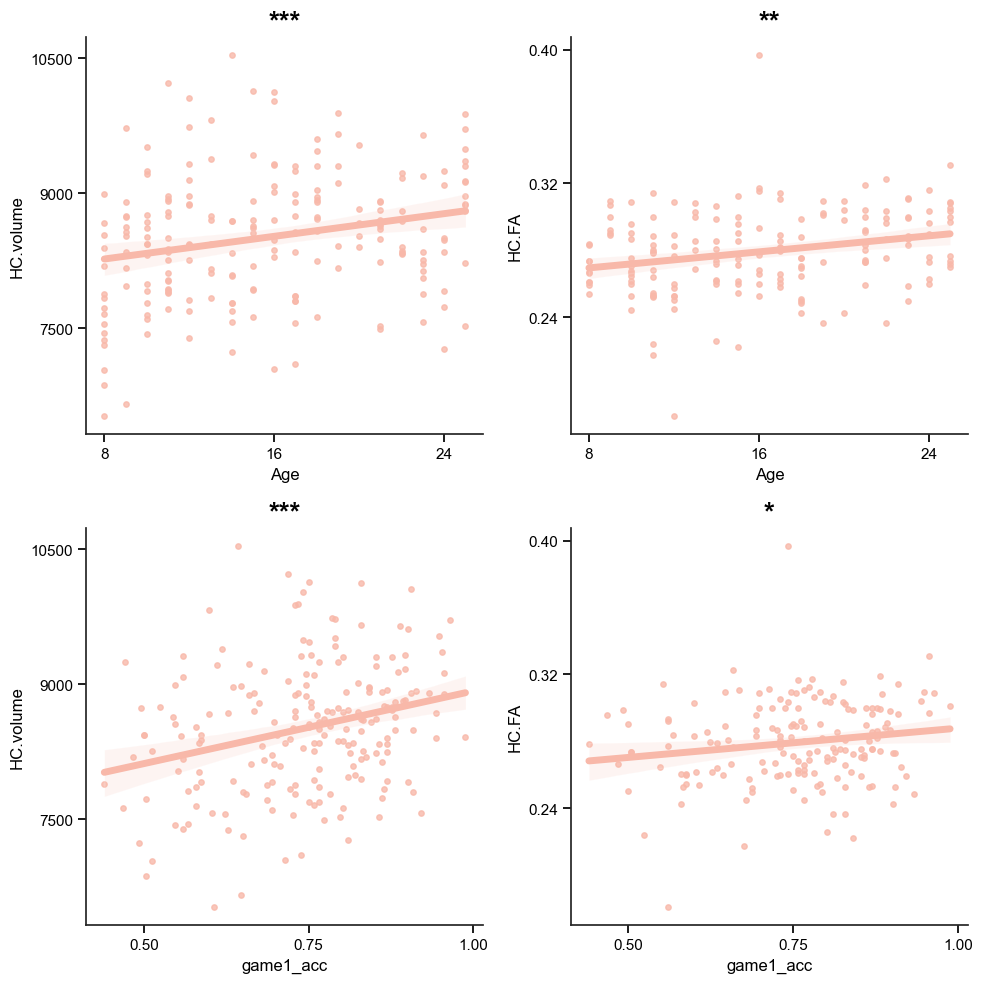

In [75]:
brain_measures = ['HC.volume','HC.FA']
beh_measures = ['Age','game1_acc']

# Initialize the plot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))


for i, beh_measure in enumerate(beh_measures):
    for j, brain_measure in enumerate(brain_measures):
        # Extract the relevant columns
        x = metrics[beh_measure]
        y = metrics[brain_measure]

        # Compute correlation handling NaN
        if 'FA' in brain_measure:
            idx = np.isfinite(x) & np.isfinite(y)
            r, p = pearsonr(x[idx], y[idx])
        else:
            r, p = pearsonr(x, y)
        
        print("Correlation between %s and %s" % (brain_measure, beh_measure))
        print('r', round(r,3), 'p', round(p,3))

        if r > 0:
            color = '#F8B8A9'
        else:
            color = '#C7E2F0'
        # Normalize the y-axis data

        #sns.scatterplot(data=metrics, x=beh_measure, y=brain_measure, color=color, s=20, ax=axs[i])
        sns.regplot(data=metrics, x=beh_measure, y=brain_measure, color=color, order=1, scatter=True,line_kws={'linewidth': 5}, ax=axs[i][j],label=brain_label,scatter_kws={'s':15})

        # Setup labels and despine
        axs[i][j].xaxis.set_major_locator(MaxNLocator(nbins=3))
        axs[i][j].yaxis.set_major_locator(MaxNLocator(nbins=3))

        #axs[i].set_ylabel('Mean volume (mm^3/NVoxel)', fontsize=15)

        title = p2sign(p)
        axs[i][j].set_title(title, size=20, fontweight='bold')

# Uncomment the lines below if you want to save the figure
fig.tight_layout()
savepath = '/mnt/workdir/DCM/Result/paper/figure6/corr_HC-structure_behavior.pdf'
plt.savefig(savepath, bbox_inches='tight', pad_inches=0, dpi=300, transparent=True)

# Show the plot
plt.show()

r -0.362 p 0.0


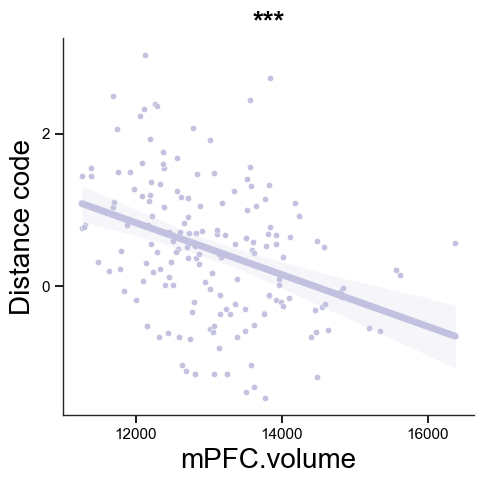

In [58]:
# Initialize the plot
fig, ax = plt.subplots(figsize=(5,5))
metrics_game2 = metrics.dropna(subset=['Distance code (Game2)'])
metrics_game2 = metrics_game2.dropna(subset=['mPFC.volume'])
x_list = ['mPFC.volume']

for i, x in enumerate(x_list):
    sns.scatterplot(data=metrics_game2,x=x, y='Distance code (Game2)', color='#C2C1E0', s=20, alpha=1, ax=ax)
    sns.regplot(data=metrics_game2,x=x, y='Distance code (Game2)', color='#C2C1E0', order=1, scatter=False,line_kws={'linewidth': 4}, ax=ax)

    # Setup labels and despine
    ax.set_xlabel(x, fontsize=20)
    ax.set_ylabel('Distance code', fontsize=20)
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.xaxis.set_major_locator(MaxNLocator(nbins=3))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
    
    # Compute pearson correlation
    r, p = pearsonr(metrics_game2[x], metrics_game2['Distance code (Game2)'])
    print('r', round(r,4), 'p', round(p,4))

    # Add title based on significance level
    ax.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
    ax.tick_params(axis='y', which='both', left=True, right=False, direction='out')

    title = p2sign(p)
    ax.set_title(title, size=20, fontweight='bold')

# Uncomment the lines below if you want to save the figure
fig.tight_layout()
savepath = '/mnt/workdir/DCM/Result/paper/figure6/corr_structural_functional.pdf'
plt.savefig(savepath, bbox_inches='tight', pad_inches=0, dpi=300, transparent=True)

# Show the plot
plt.show()